데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Multivariate_data_analysis

데이터: https://onlinecourses.science.psu.edu/onlinecourses/sites/stat505/files/data/sales.txt<br>
참고:<br>
Borga, M. (2001). Canonical correlation: a tutorial. On line tutorial http://people.imt.liu.se/magnus/cca, 4(5).<br>
Friederichs, P., & Hense, A. (2003). Statistical inference in canonical correlation analyses exemplified by the influence of North Atlantic SST on European climate. Journal of climate, 16(3), 522-534.<br>
https://math.stackexchange.com/questions/222689/eigenvalue-decomposition-of-block-covariance-matrix-for-canonical-correlation-an<br>
http://www.statpower.net/Content/312/Lecture%20Slides/CanonicalCorrelation.pdf<br>
https://onlinecourses.science.psu.edu/stat505/lesson/13/13.3<br>


목차<br>
1. Conanical Correlation Analysis 서론
2. CCA 학습 과정
3. CCA 추정
4. Scaling
5. 실습 : CCA R로 직접 구현
6. Wilks Lambda Test
7. 데이터 예제

# 1. Conanical Correlation Analysis 서론

- pca는 변수 내의 관계를 봤다면 cca는 두 변수 간의 관계를 보는 것
- 예를 들어 적성에 관계된 변수들과 성취도에 관한 변수들이 있을 때 정석과 성취도의 관계를 보고 싶을 때 사용가능

<b>기본적 가정과 Notation</b><br>
X와 Y가 Randomvector라고 가정: 
$X_{(px1)}= \begin{bmatrix}X_{1} \\
... \\X_{p}\end{bmatrix}\sim (\mu_{X}, \Sigma_{X})$
$Y_{(qx1)}=\begin{bmatrix}X_{1} \\
... \\X_{q}\end{bmatrix}\sim (\mu_{Y}, \Sigma_{Y})$<br>

$Z=(X,Y) \sim (\mu, \Sigma)$라고 할 때 $\mu_{((p+q)x1)}=\begin{bmatrix}\mu_{X} \\
\mu_{Y}\end{bmatrix}$ 이고<br>
$\Sigma_{((p+q)x(p+q) )}=\begin{bmatrix}
    \Sigma_{XX}       & \Sigma_{XY} \\
    \Sigma_{YX}       & \Sigma_{YY} \\
\end{bmatrix}$

$\Sigma_{XX}(pxp),\Sigma_{YY}(qxq)$: X와 Y 각각의 variance matrix<br>
$\Sigma_{XY}(pxq),\Sigma_{YX}(qxp)$: X와 Y의 covariance matrix<br>

<b>Cononical variate</b><br>

X와 Y의 linear combination의 집합 U,V를 Canonical variate이라고 함 <br>
Canonical variate: $U_{(1x1)}=\alpha^{'}X$<br>
Canonical variate: $V_{(1x1)}=\beta^{'}X$<br>
가중치 벡터: $\alpha_{(px1)}= \begin{bmatrix} \alpha_{1} \\
... \\ \alpha_{p}\end{bmatrix}$
$\beta_{(qx1)}=\begin{bmatrix} \beta_{1} \\
... \\ \beta_{q}\end{bmatrix}$<br>
$Var(U)=\alpha^{'} \Sigma_{XX} \alpha$<br>
$Var(V)=\beta^{'} \Sigma_{YY} \beta$<br>
$Cov(U,V)=\alpha^{'} \Sigma_{XY} \beta$<br>

<b>CCA의 목적함수</b><br>
$(\hat{\alpha},\hat{\beta})=\arg\max_{\alpha,\beta} Corr(U,V)=\arg\max_{\alpha,\beta} \frac{Cov(U,V)}{\sqrt{Var(U)}\sqrt{Var(V)}}=\frac{\alpha^{'}\Sigma_{XY}\beta}{\sqrt{\alpha^{'} \Sigma_{XX} \alpha} \sqrt{\beta^{'} \Sigma_{YY} \beta}  }$<br>
CCA는 $X$의 linear combination과 $Y$의 linear combination을 최대화하는 $\alpha,\beta$를 찾는 문제로 볼 수 있음<br>
이 때 unique한 $(\hat{\alpha},\hat{\beta})$를 구하기 위해 $Var(U)=Var(V)=1$로 Unit variance라는 constraint를 줘서 목적함 수는 다음과 같아짐<br>
$(\hat{\alpha},\hat{\beta})=\arg\max_{\alpha,\beta} Cov(U,V)=\alpha^{'}\Sigma_{XY}\beta$<br>
=> 즉 CCA는 $X$의 basis vector $\alpha$로의 projection과 $Y$의 basis vector $\beta$로의 projection의 correlation을 최대화하는 문제

# 2. CCA 학습 과정

<b>Canonical pair와 CCA의 $\alpha$, $\beta$를 찾는 과정</b>

$(U_{l},V_{l})$을 $l$번째 canonical pair라고 부름, ($min(p,q)=p$이기 때문에 p개의 pair 존재)<br>
$U_{1}=\alpha_{11}X_{1}+,,,+\alpha_{1p}X_{p}=\alpha_{1}X $<br>
...<br>
$U_{p}=\alpha_{p1}X_{1}+,,,+\alpha_{pp}X_{p}=\alpha_{p}^{'}X $<br>
Canonical variate: $V_{(qx1)}=\beta^{'}Y$<br>
$V_{1}=\beta_{11}Y_{1}+,,,+\beta_{1p}Y_{q}=\beta_{1}Y $<br>
...<br>
$V_{q}=\beta_{q1}Y_{1}+,,,+\beta_{qq}Y_{q}=\beta_{q}^{'}Y $<br>

이러한 $\alpha$, $\beta$를 찾을 때 
1번째 canonical variate pair를 먼저 최대화 함<br>
$(\hat{\alpha_{1}}^{'},\hat{\beta}_{1}^{'})=\arg\max_{\alpha_{1}^{'},\beta_{1}^{'}}Corr(U_{1},V_{1}) $ subject to $ Var(U_{1})=Var(V_{1})=1 $<br>
이 후 2번 째 pair에 대해서는<br>
$(\hat{\alpha_{2}}^{'},\hat{\beta}_{2}^{'})=\arg\max_{\alpha_{2}^{'},\beta_{2}^{'}}Corr(U_{2},V_{2}) $ subject to $ Var(U_{2})=Var(V_{2})=1 $<br>
$Cov(U_{1},U_{2})=Cov(V_{1},V_{2})=Cov(U_{1},V_{2})=Cov(U_{2},U_{2})=0$으로 1번째 canonical variate pair와 2번째 canonical variate pair를 uncorrelate하게 만듬

따라서 $l$번째 canonical variate pair의 제약 조건은 <br>
$ Var(U_{l})=...=Var(V_{l})=1 $<br>
$Cov(U_{1},U_{i})=Cov(V_{1},V_{l})=0$<br>
...<br>
$Cov(U_{l-1},V_{i})=Cov(U_{l},V_{l-1})=0$으로 제약 조건이 점점 많아짐

https://www.cs.cmu.edu/~tom/10701_sp11/slides/CCA_tutorial.pdf
https://math.stackexchange.com/questions/222689/eigenvalue-decomposition-of-block-covariance-matrix-for-canonical-correlation-an
http://www.statpower.net/Content/312/Lecture%20Slides/CanonicalCorrelation.pdf

# 3. CCA 추정

<b>$\alpha,beta$는 어떻게 추정할까?</b><br>
<br>
$(\hat{\alpha},\hat{\beta})=\arg\max_{\alpha,\beta} \alpha^{'}\Sigma_{XY}\beta$, subject to $Var(U)=\alpha^{'} \Sigma_{XX} \alpha=1$,
$Var(V)=\beta^{'} \Sigma_{YY} \beta=1$<br>
<br>
제약 조건하에 최대화 하는 것이기 때문에 lagrange를 이용<br>
A=$\alpha^{'}\Sigma_{XY}\beta-\frac{1}{2}\lambda_{1}(\alpha^{'} \Sigma_{XX} \alpha)-\frac{1}{2}\lambda_{2} \beta^{'} \Sigma_{YY} \beta$라고 하면<br>
$\frac{\partial A}{\partial \alpha}$=>$\Sigma_{xy}\beta-\lambda_{1}\Sigma_{xx}\alpha=0$<br>
$\frac{\partial A}{\partial \beta}$=>$\Sigma_{yx}\alpha-\lambda_{2}\Sigma_{yy}\beta=0$<br>
여기서 $\lambda_{1},\lambda_{2}$는 lagrange multiplier이고 $\alpha^{'}$, $\beta^{'}$를 각각 곱하면<br>
$\alpha^{'}\Sigma_{xy}\beta-\lambda_{1}=0$<br>
$\beta^{'}\Sigma_{yx}\alpha-\lambda_{2}=0$<br>
=>$\lambda_{1}=\lambda_{2}$이 됨<br>
<br>
만약 $\Sigma_{xx},\Sigma_{yy}$가 non-singular이고 각각의 inverse를 곱하면<br>
$\Sigma_{xx}^{-1}\Sigma_{xy}\beta-\lambda_{1}\alpha=0$<br>
$\Sigma_{yy}^{-1}\Sigma_{yx}\alpha-\lambda_{1}\beta=0$<br>
$\lambda$를 서로 대입하면<br>
$\frac{1}{\lambda_{1}}\Sigma_{xx}^{-1}\Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx}\alpha-\lambda_{1}\alpha $<br>
$\frac{1}{\lambda_{1}}\Sigma_{yy}^{-1}\Sigma_{yx}\Sigma_{xx}^{-1}\Sigma_{xy}\beta-\lambda_{1}\beta $<br>
=> $\Sigma_{xx}^{-1}\Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx} \hat{\alpha}=\lambda^{2}\hat{\alpha}$<br>
$\Sigma_{yy}^{-1}\Sigma_{yx}\Sigma_{xx}^{-1}\Sigma_{xy}\hat{\beta}=\lambda^{2}\hat{\beta}$

$(\Sigma_{xx}^{-1}\Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx} - \lambda^{2})\hat{\alpha}=0$<br>
$(\Sigma_{yy}^{-1}\Sigma_{yx}\Sigma_{xx}^{-1}\Sigma_{xy} - \lambda^{2})\hat{\beta}=0$<br>
=>여기서 왼쪽을 0으로 만들면 되기 때문에 결국 $\Sigma_{xx}^{-1}\Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx}$의 eigenvalue의 root, $\Sigma_{yy}^{-1}\Sigma_{yx}\Sigma_{xx}^{-1}\Sigma_{xy}$의 root를 각각 구하면 됨

# 4. Scaling

소프트웨어마다 결과 값이 다른 이유는 scaling이 달라서일 가능성이 큼

<b>Scaling 방법</b><br>
- Completely Raw: Covariance matrix에서 eigenvalue 구하고 scaling 안함(앞의 과정)<br>
- Partially Standardized: Weight에 constant 곱해서 canonical variates이 unit variance 갖게 만듬<br>
- Fully Standardized: standardized variable에 계산 후 (Correlation Matrix) Weight에 constant 곱해서 canonical variates이 unit variance 갖게 만듬

첫 번째 pair부터 eigen vector $\alpha,\beta$를 정렬하면 다음과 같음(모자 생략)<br>
$A_{(pxp)}=\begin{bmatrix}
    \alpha_{11} & \alpha_{12} & ... & \alpha_{1p} \\
    \alpha_{21} & \alpha_{22} & ... & \alpha_{2p} \\
    ... \\
    \alpha_{p1} & \alpha_{p2} & ... & \alpha_{pp} \\
\end{bmatrix}$<br>
$B_{(pxq)}=\begin{bmatrix}
    \beta_{11} & \beta_{12} & ... & \beta_{1q} \\
    \beta_{21} & \beta_{22} & ... & \beta_{2q} \\
    ... \\
    \beta_{p1} & \beta_{p2} & ... & \beta_{pq} \\
\end{bmatrix}$


<b>1) Partially Standardized Weights</b><br>
$U=XA, V=YB$, $Var(U)=A^{'}\Sigma_{xx}A$ $Var(V)=B^{'}\Sigma_{yy}B$<br>
각각을 표준편차로 나눠주면<br>
$U^{*}=XA Var(U)^{-1/2}$<br>
$V^{*}=YB Var(V)^{-1/2}$

<b>2) Fully Standardized Weights</b><br>
X와 Y를 각각 표준화<br>
$\Sigma_{xx}^{-1}\Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx}$, $\Sigma_{yy}^{-1}\Sigma_{yx}\Sigma_{xx}^{-1}\Sigma_{xy}$를 구한다음 다시 표준화<br>

# 5. 실습 : CCA R로 직접 구현

In [30]:
source("http://www.statpower.net/R312/Steiger R Library Functions.txt")
source("http://www.statpower.net/R312/Data 1.txt")
source("http://www.statpower.net/R312/CanCorr.r")
## SAS output
output <- canonical.cor(X, Y)

In [4]:
dim(X)
dim(Y)

[1] 9 3

[1] 9 3

임의의 데이터<br>
$X_{(9x3)},Y_{(9x3)}$

1) $\Sigma_{xx},\Sigma_{xy},\Sigma_{yx},\Sigma_{yy}$ 계산

In [5]:
S.xx <- var(X)
S.xy <- cov(X, Y)
S.yx <- cov(Y, X)
S.yy <- var(Y)

$\Sigma_{xx}^{-1}\Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx}$ $\Sigma_{yy}^{-1}\Sigma_{yx}\Sigma_{xx}^{-1}\Sigma_{xy}$의 eigenvector,eigenvalue 계산

In [6]:
A <- eigen(solve(S.xx) %*% S.xy %*% solve(S.yy) %*% S.yx)$vectors
B <- eigen(solve(S.yy) %*% S.yx %*% solve(S.xx) %*% S.xy)$vectors
R <- sqrt(eigen(solve(S.yy) %*% S.yx %*% solve(S.xx) %*% S.xy)$values)

<b> 1) Raw scaling </b>

In [7]:
A
B

0.4000005,0.7960601,-0.5776411
0.5999997,-0.5837796,0.4286259
-0.6928203,-0.1596549,0.6947018


1.940668e-07,-0.5365309,-0.8347746
-4.335515e-07,0.8437704,0.1385922
1.000000e+00,0.0136431,-0.5328635


<b>2) Partially Standardized Weights</b>

$A^{*}=AVar(U)^{-1/2}$<br>
$B^{*}=BVar(V)^{-1/2}$

In [10]:
A.single <- A %*% solve(sqrt(diag(diag(var(X %*% A)))))
B.single <- B %*% solve(sqrt(diag(diag(var(Y %*% B)))))
A.single
B.single

0.4323655,1.4467842,-0.8180369
0.6485470,-1.0609791,0.6070064
-0.7488779,-0.2901618,0.9838146


2.097691e-07,-0.84865163,-1.5199701
-4.686311e-07,1.33462432,0.2523508
1.080912e+00,0.02157982,-0.9702457


In [29]:
output[2]
output[3]

0.4323655,-1.4467842,-0.8180369
0.6485470,1.0609791,0.6070064
-0.7488779,0.2901618,0.9838146


2.097691e-07,-0.84865163,-1.5199701
-4.686311e-07,1.33462432,0.2523508
1.080912e+00,0.02157982,-0.9702457


SAS 결과와 같음

<b>3) Fully Standardized Weights</b>

Z score 이용<br>
Q operator로 score을 deivation score로 변환<br>
Q1은 vector $1$의 complementary orthogonal projector<br>
Original vecotr $-$orthognal projection $Q= 1-1(1^{'}1)1$

In [18]:
X.dev <- Q(UnitVector(9)) %*% X
Y.dev <- Q(UnitVector(9)) %*% Y

$Z_{x}=Q\Sigma_{xx}^{-1/2}$<br>
$Z_{y}=Q\Sigma_{yy}^{-1/2}$

In [15]:
## Z-score X,Y Create diagonal matrices with standard
## deviations Then invert using solve
D.x <- solve(sqrt(diag(diag(var(X)))))
D.y <- solve(sqrt(diag(diag(var(Y)))))
## Postmultiply the deviation score matrix to create
## Z-scores
Z.x <- X.dev %*% D.x
Z.y <- Y.dev %*% D.y

correlation에 대해 계산<br>
$R_{xx}^{-1}R_{xy}R_{yy}^{-1}R_{yx}$, $R_{yy}^{-1}R_{yx}R_{xx}^{-1}R_{xy}$<br>
$A^{*}=ACov(Z_{x}A)^{-1/2}$<br>
$B^{*}=BCov(Z_{x}A)^{-1/2}$

In [36]:
R.xy <- cor(X, Y)
R.xx <- cor(X)
R.yx <- cor(Y, X)
R.yy <- cor(Y)
A.s <- eigen(solve(R.xx) %*% R.xy %*% solve(R.yy) %*% R.yx)$vectors
B.s <- eigen(solve(R.yy) %*% R.yx %*% solve(R.xx) %*% R.xy)$vectors
A.fully <- A.s %*% solve(sqrt(diag(diag(var(Z.x %*% A.s)))))
B.fully <- B.s %*% solve(sqrt(diag(diag(var(Z.y %*% B.s)))))

In [17]:
A.fully
B.fully

0.6404914,2.1432165,-1.2118119
0.8647293,-1.4146388,0.8093419
-1.0442604,-0.4046112,1.3718640


2.097691e-07,-0.84865163,-1.5199701
-4.939805e-07,1.40681755,0.2660011
9.999999e-01,0.01996446,-0.8976176


In [32]:
output[4]
output[5]

0.6404914,-2.1432165,-1.2118119
0.8647293,1.4146388,0.8093419
-1.0442604,0.4046112,1.3718640


2.097691e-07,-0.84865163,-1.5199701
-4.939805e-07,1.40681755,0.2660011
9.999999e-01,0.01996446,-0.8976176


Loading<br>
$corr(X,U)$, $corr(Y,V)$

In [50]:
cor(X,X%*%A)
cor(Y,Y%*%B)

0.508427758,0.6402387,0.5758434
0.772113573,0.1218987,0.6236837
-0.006403743,0.4936286,0.8696493


-0.6630289,1.390796e-01,-7.355607e-01
-0.4141582,7.947229e-01,-4.437212e-01
1.0000000,3.634030e-07,-6.489173e-08


In [34]:
output[6]
output[7]

0.508427758,-0.6402387,0.5758434
0.772113573,-0.1218987,0.6236837
-0.006403743,-0.4936286,0.8696493


-0.6630289,1.390796e-01,-7.355607e-01
-0.4141582,7.947229e-01,-4.437212e-01
1.0000000,3.634030e-07,-6.489173e-08


Canonical Loading: 관측된 변수와 Canonical variable간의 correlation

In [51]:
cor(X%*%A,Y%*%B)

1.000000e+00,2.972265e-16,-7.249799e-17
3.480917e-16,-5.193831e-01,8.753114e-16
2.586973e-16,-4.072115e-16,9.103064e-02


# 6. Wilks Lambda Test

- 여러 개의  다변량 데이터의 독립성 테스트
- Multivaraite Normal 가정
- Likelihood Ratio Test<br>
$H_{0}:\rho_{0}=\rho_{1}=...=\rho_{p} =0$<br>
$\Lambda=\sum_{i=1}^{p}(1-\lambda_{i})$<br>
$\frac{1-\Lambda^{1/v}}{\Lambda^{1/v}}>\frac{pq}{\delta v - pq/2 +1}F $<br>
서로 Correlate 하지 않으면 eigen value의 값이 작아짐=> Test statistic 커짐 => 기각



# 7. 데이터 예제

In [78]:
setwd('C:/Users/bki19/desktop/Multivariate_data_analysis/data')

In [79]:
df<-read.table('./sales.txt')

기업에서 50명의 직원들을 대상으로 설문조사해서 어떤 요인이 판매 실적에 영향을 주는지 알고 싶음<br>
판매 실적에 관한 변수(전 년도 대비 성장률인듯)<br>
V1: 판매 성장<br>
V2: 판매 이익<br>
V3: 새 계정 판매<br>
지능 테스트 점수<br>
V4: 창의성<br>
V5: 기계적 추론 능력<br>
V6: 추상적 추론 능력<br>
V7: 수학<br>


In [98]:
CCA<-canonical.cor(df[,c(1:3)],df[,c(4:7)])

<b>1) Test for Relationship Between Canonical Variate Pairs</b>

In [105]:
CCA[1]

Canonical R,Wilk's Lambda,F,df1,df2,p value
0.9944827,0.002148472,87.39152,12,114.0588,1.218273e-51
0.8781065,0.195241267,18.52627,6,88.0000,8.246554e-14
0.3836057,0.852846693,NaN,2,NaN,NaN


먼저 Wilk's lambda test를 통해 두 변수가 연관성이 있는지 확인<br>
$H_{0}:\rho_{0}=\rho_{1}=\rho_{3}=0 $<br>
모든 p개의 canonical variate pair가 모두 uncorrelated 한지<br>
$H_{0}$ 기각=> 최소 하나의 correlated한 canonical variate pair가 있음<br>
<br>
$H_{0}:\rho_{2}=\rho_{3}=0$<br>
$H_{0}$ 기각=> 두 번째나 세 번째 canonical variate pair 중 하나는 correlated한 것이 있음<br>
<br>
$H_{0}:\rho_{3}=0$<br>
$H_{0}$ 기각=> 세 번째 canonical variate pair는 correlated함<br>
=> 모든 세 개의 canonical variate pairs는 유의하게 correlated하고 서로 독립적이지 않음<br>
=> Wilk 테스트는 위와 같이 순차적으로 유의하지 않은 결과가 나올 때까지 진행<br>

<b>2) Obtain Estimates of Canonical Correlation</b>

Canonical Correlation<br> 
$Cov(U_{1},V_{1})=\sqrt{\lambda_{1}}=\rho_{1}=0.994483$<br>
$Cov(U_{2},V_{2})=\sqrt{\lambda_{2}}=\rho_{2}=0.878107$<br>
$Cov(U_{3},V_{3})=\sqrt{\lambda_{3}}=\rho_{3}=0.383606$<br>
=>각각을 제곱한 결과를 $R^2$처럼 해석 가능<br>
=>$U_{1}$의 변동성의 98.9퍼센트가  $V_{1}$에 의해 설명 됨

In [123]:
CCA[2]

V1,0.06237788,-0.1740703,-0.3771529
V2,0.02092564,0.2421641,0.1035150
V3,0.07825817,-0.2382940,0.3834151


Estimated canonical coefficients<br>
$U_{1}=\hat{\alpha}^{'}_{1}X =0.0624X_{growth}+0.0209X_{profit}+0.0783X_{new}$

In [124]:
CCA[3]

V4,0.06974814,-0.19239132,0.24655659
V5,0.03073830,0.20157438,-0.14189528
V6,0.08956418,-0.49576326,-0.28022405
V7,0.06282997,0.06831607,0.01133259


Estimated canonical coefficients<br>
$U_{1}=\hat{\beta}^{'}_{1}Y =0.0697Y_{create}+0.0307Y_{mech}+0.0896Y_{abstract}+0.0628Y_{math}$

In [125]:
CCA[6]

V1,0.9798776,0.0006477883,-0.199598477
V2,0.9464085,0.3228847489,0.007504408
V3,0.9518620,-0.1863009724,0.243414776


$corr(X,U)$<br>
각 변수와 대응 되는 Canonical variable 사이의 correlation<br>
sales1과 각 변수의 correlation은 모두 1에 가까움 => 첫 번째 canonical variable은 판매 능력을 측정하는 전체적인 척도<br>
sales2과 각 변수의 correlation은 모두 매우 낮음 => 두 번째 canonical variable은 데이터에 대한 정보가 많이 없음<br>

In [127]:
CCA[7]

V4,0.6383313,-0.2156981,0.65140953
V5,0.7211626,0.2375644,-0.06773775
V6,0.6472493,-0.5013329,-0.57422365
V7,0.9440859,0.1975329,-0.09422619


$corr(Y,V)$<br>
각 변수와 대응 되는 Canonical variable 사이의 correlation<br>
위와 마찬가지<br>
=>첫 번째 canonical variable에서 math에 대해 압도적으로 큼<br>
=>두 번째 canonical variable에서 abstract reasoning에 대해 상당히 negative

In [139]:
X<-as.matrix(df[,c(1,2,3)] )
Y<-as.matrix(df[,c(4,5,6,7)])
S.xx <- var(X)
S.xy <- cov(X, Y)
S.yx <- cov(Y, X)
S.yy <- var(Y)
A <- eigen(solve(S.xx) %*% S.xy %*% solve(S.yy) %*% S.yx)$vectors
B <- eigen(solve(S.yy) %*% S.yx %*% solve(S.xx) %*% S.xy)$vectors
cor(X,Y%*%B)

V1,0.9744713,0.0005688272,-0.076567107,3.407532e-16
V2,0.9411869,0.2835272081,0.002878734,2.826325e-16
V3,0.9466102,-0.1635921013,0.093375287,3.163043e-16


cor(X,V)<br>
sales 변수와 테스트 점수의 canonical covariate의 correlation<br>
0.9744, 0.9411, 0.9466 등으로 sales의 canonical covariate와 유사한 결과 => 첫 번째 Canonical Correlation이 매우 높았기 때문

In [140]:
cor(Y,X%*%A)

V4,0.6348095,0.1894059,0.24988439
V5,0.7171837,-0.2086069,-0.02598458
V6,0.6436782,0.4402237,-0.22027544
V7,0.9388771,-0.1734549,-0.03614570


앞선 결과와 비슷하게 Math가 앞도적으로 높음 => 역시 첫 번째 Canonical Correlation이 매우 높았기 때문

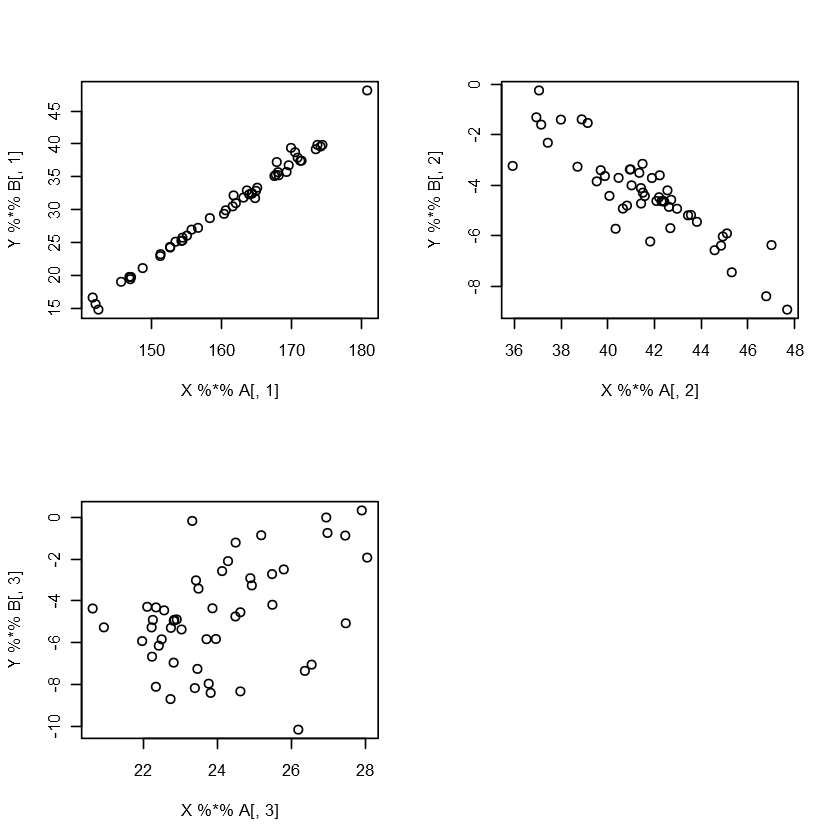

In [142]:
par(mfrow=c(2,2))
plot(X%*%A[,1], Y%*%B[,1] )
plot(X%*%A[,2], Y%*%B[,2] )
plot(X%*%A[,3], Y%*%B[,3] )

$(U_{1},V_{1})$,$(U_{2},V_{2})$,$(U_{3},V_{3})$의 plot으로 뒤로 갈 수록 correlation이 약해짐